In [2]:
import numpy as np

#Importing some standard Qiskit Libraries:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble, execute

from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state

from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from ibm_quantum_widgets import *

#Loading my IBM Q account:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-17 17:21:27,901: Credentials are already in use. The existing account in the session will be replaced.


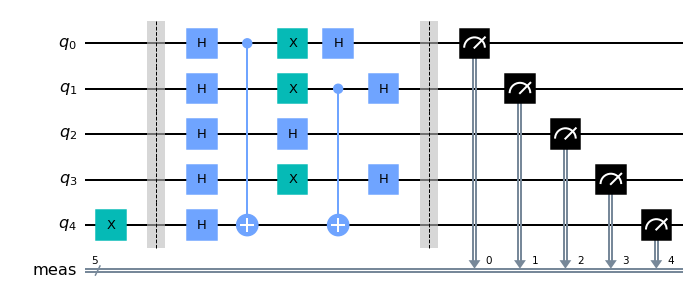

In [10]:
qc = QuantumCircuit(5)

qc.x(4)
qc.barrier()

for i in range(5):
    qc.h(i)

qc.cx(0,4)

qc.x(1)
qc.x(3)

qc.cx(1,4)

qc.x(0)

for i in range(4):
    qc.h(i)
    
qc.measure_all()

qc.draw()


{'00011': 981, '10011': 1067}


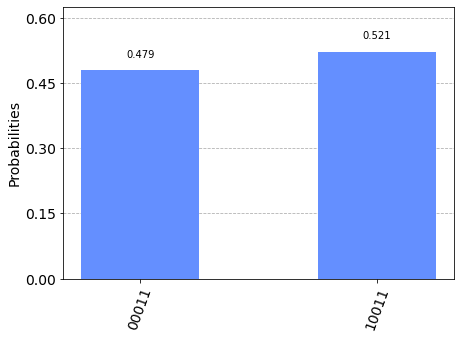

In [11]:
#We now have a quantum circuit! Now we have to actually run it.
#Firstly, let's run it on a simulator(s):

#We firstly obtain the QASM Simulator backend:
backendQASM = Aer.get_backend("qasm_simulator")
#And then the Statevector Simulator backend:
backendStateVector = Aer.get_backend("statevector_simulator")

#And then run the job of simulating qCircuit on this backend, 1024 times (also called shots):
jobSimulator = execute(qc, backendQASM, shots = 2048)

#We then extract the result from this jobSimulator:
resultSimulator = jobSimulator.result()

#We then print out the number of times the state '00' and '11' are measured over all 1024 shots:
print(resultSimulator.get_counts(qc))
#Plotting the Histogram of the above data:
plot_histogram(resultSimulator.get_counts(qc))